In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# 데이터불러오기
data_path = '../data/apple_quality.csv'

df = pd.read_csv(data_path)

In [3]:
df.drop(columns=["A_id"]).describe().style.background_gradient(cmap = "YlGnBu")

,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,-0.503015,-0.989547,-0.470479,0.985478,0.512118,0.498277,0.076877
std,1.928059,1.602507,1.943441,1.402757,1.930286,1.874427,2.110270
min,-7.151703,-7.149848,-6.894485,-6.055058,-5.961897,-5.864599,-7.010538
25%,-1.816765,-2.011770,-1.738425,0.062764,-0.801286,-0.771677,-1.377424
50%,-0.513703,-0.984736,-0.504758,0.998249,0.534219,0.503445,0.022609
75%,0.805526,0.030976,0.801922,1.894234,1.835976,1.766212,1.510493
max,6.406367,5.790714,6.374916,7.619852,7.364403,7.237837,7.404736


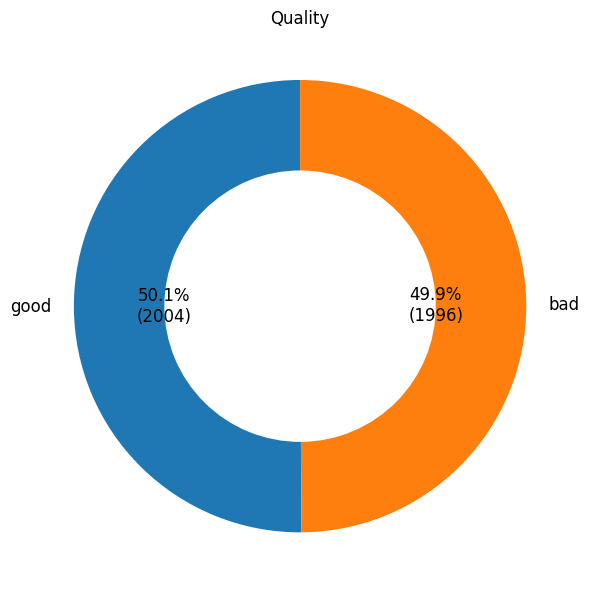

In [4]:
import matplotlib.pyplot as plt

# Quality 컬럼의 값 개수 계산
gender_counts = df['Quality'].value_counts()

# 비율과 개수를 같이 표시하는 함수
def func(pct, allvals):
    absolute = int(pct/100.*sum(allvals))
    return f"{pct:.1f}%\n({absolute:d})"

plt.figure(figsize=(6, 6))

plt.pie(
    gender_counts,
    labels=gender_counts.index,
    autopct=lambda pct: func(pct, gender_counts),
    startangle=90,
    wedgeprops={'width': 0.4},
    textprops={'fontsize': 12}
)

plt.axis('equal')  # 원형 비율 유지
plt.title("Quality")

plt.tight_layout()
plt.show()


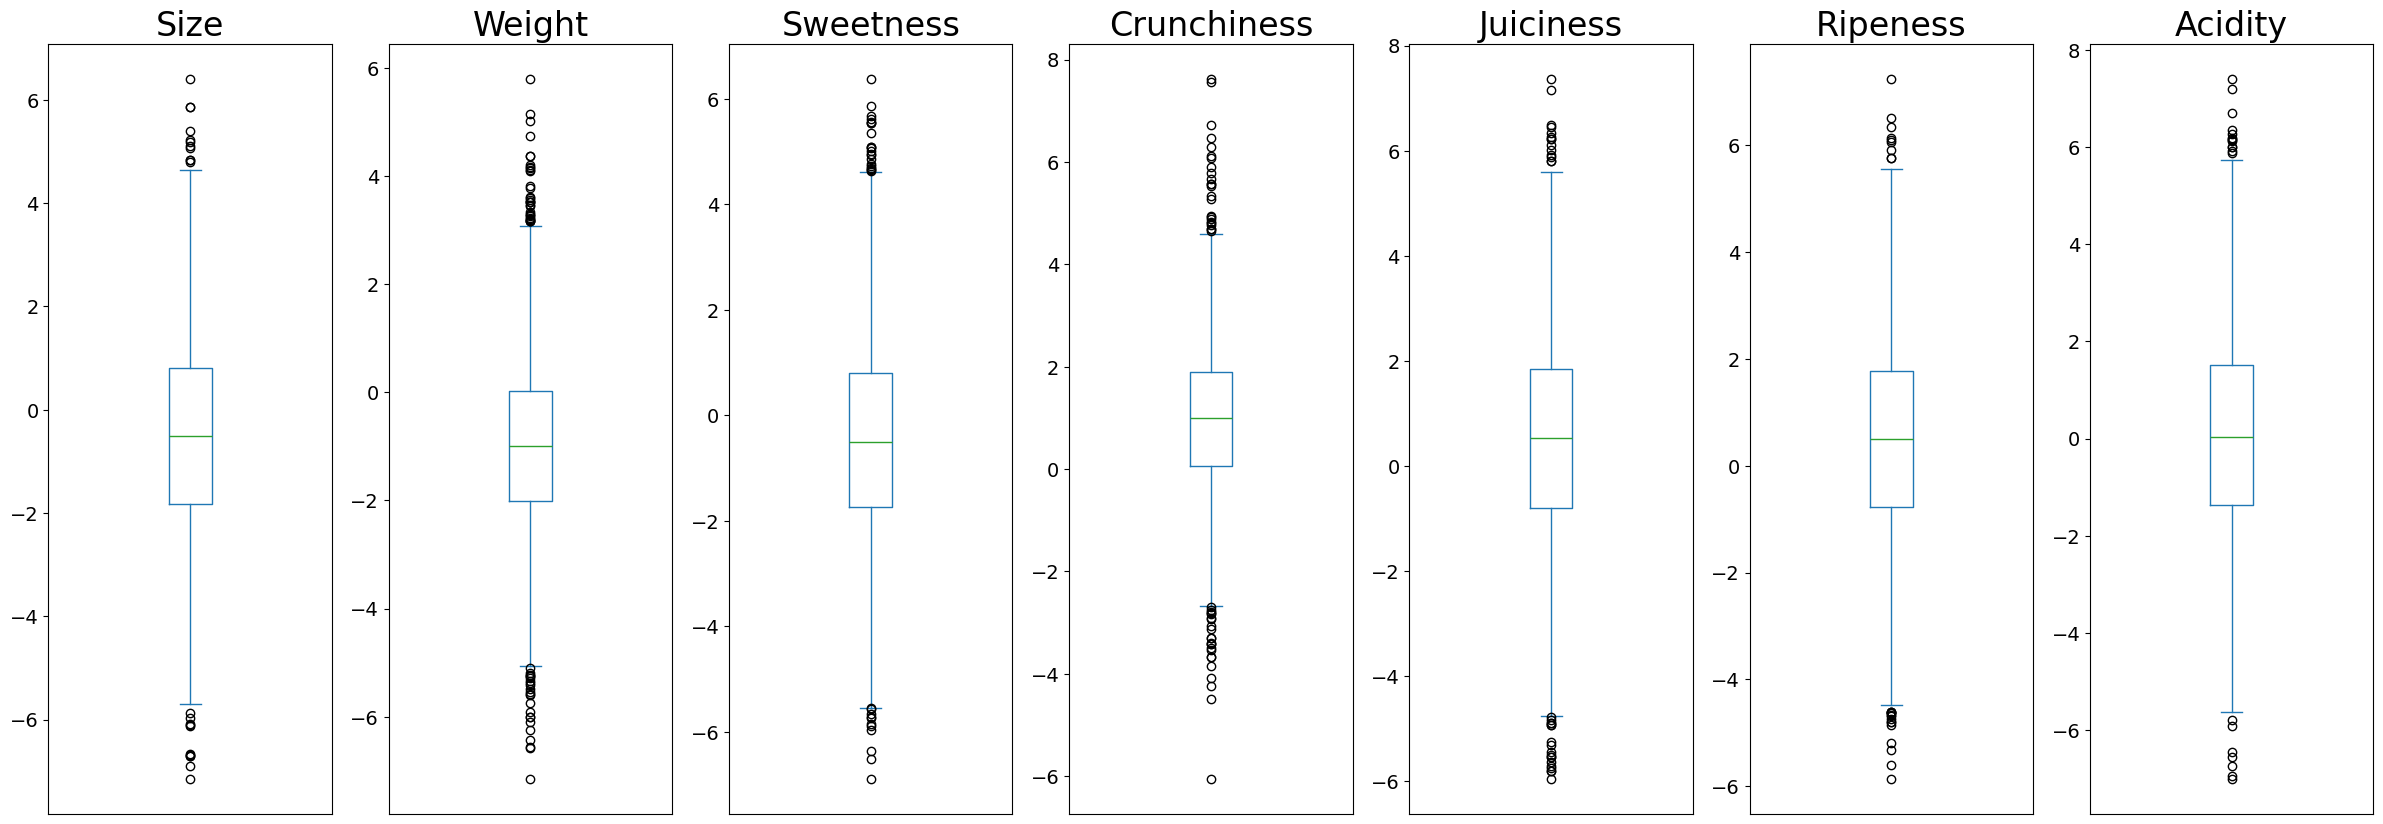

In [5]:
fig, ax = plt.subplots(1, 7, figsize=(30, 10))

features = ['Size', 'Weight', 'Sweetness', 'Crunchiness', 'Juiciness', 'Ripeness', 'Acidity']

for i, feature in enumerate(features):
    df[feature].plot(kind='box', ax=ax[i])
    ax[i].set_title(feature, fontsize=24)  # 상단 제목
    ax[i].set_xticks([])  # 아래 x축 라벨 제거
    ax[i].tick_params(axis='y', labelsize=14)  # y축 눈금 폰트 크기


In [6]:
# 이상치 대체 대상 컬럼들
cols = ['Size','Weight','Sweetness','Crunchiness','Juiciness','Ripeness','Acidity']

# 이상치 처리 함수
def replace_outliers_with_median(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    median = df[column].median()
    outlier_condition = (df[column] < lower) | (df[column] > upper)

    # 이상치 개수 출력 (선택 사항)
    print(f"{column}: {outlier_condition.sum()}개 이상치 → 중앙값으로 대체됨")

    # 이상치 대체
    df.loc[outlier_condition, column] = median
    return df

# 모든 컬럼에 대해 반복 적용
for col in cols:
    df = replace_outliers_with_median(df, col)

Size: 22개 이상치 → 중앙값으로 대체됨
Weight: 54개 이상치 → 중앙값으로 대체됨
Sweetness: 32개 이상치 → 중앙값으로 대체됨
Crunchiness: 47개 이상치 → 중앙값으로 대체됨
Juiciness: 32개 이상치 → 중앙값으로 대체됨
Ripeness: 24개 이상치 → 중앙값으로 대체됨
Acidity: 20개 이상치 → 중앙값으로 대체됨


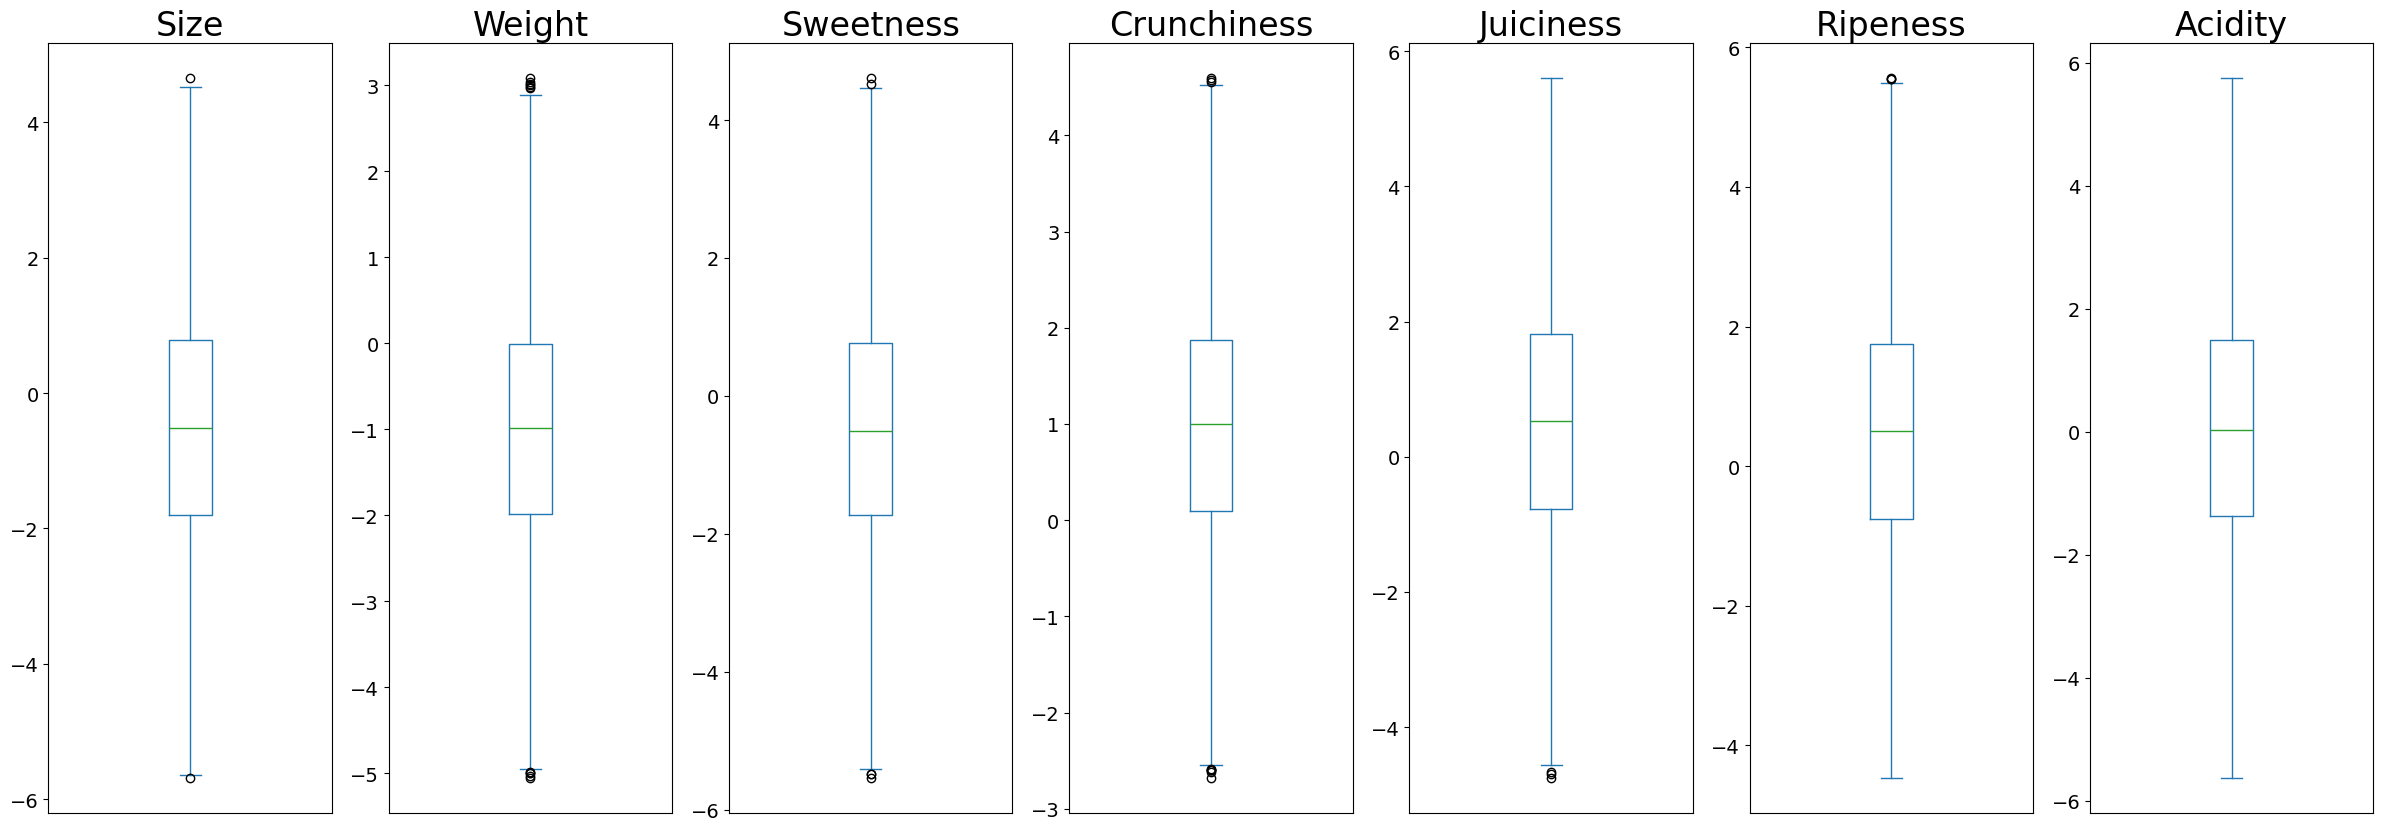

In [7]:
fig, ax = plt.subplots(1, 7, figsize=(30, 10))

features = ['Size', 'Weight', 'Sweetness', 'Crunchiness', 'Juiciness', 'Ripeness', 'Acidity']

for i, feature in enumerate(features):
    df[feature].plot(kind='box', ax=ax[i])
    ax[i].set_title(feature, fontsize=24)  # 상단 제목
    ax[i].set_xticks([])  # 아래 x축 라벨 제거
    ax[i].tick_params(axis='y', labelsize=14)  # y축 눈금 폰트 크기
